# Importing The Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

# Reading & Understanding The Data

In [2]:
bike_data=pd.read_csv("D:\python\\assignment\day.csv",index_col=0)

In [3]:
bike_data

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341


In [4]:
#manipualting the data
bike_data["dteday"]=pd.to_datetime(bike_data["dteday"])

### Pair Plot

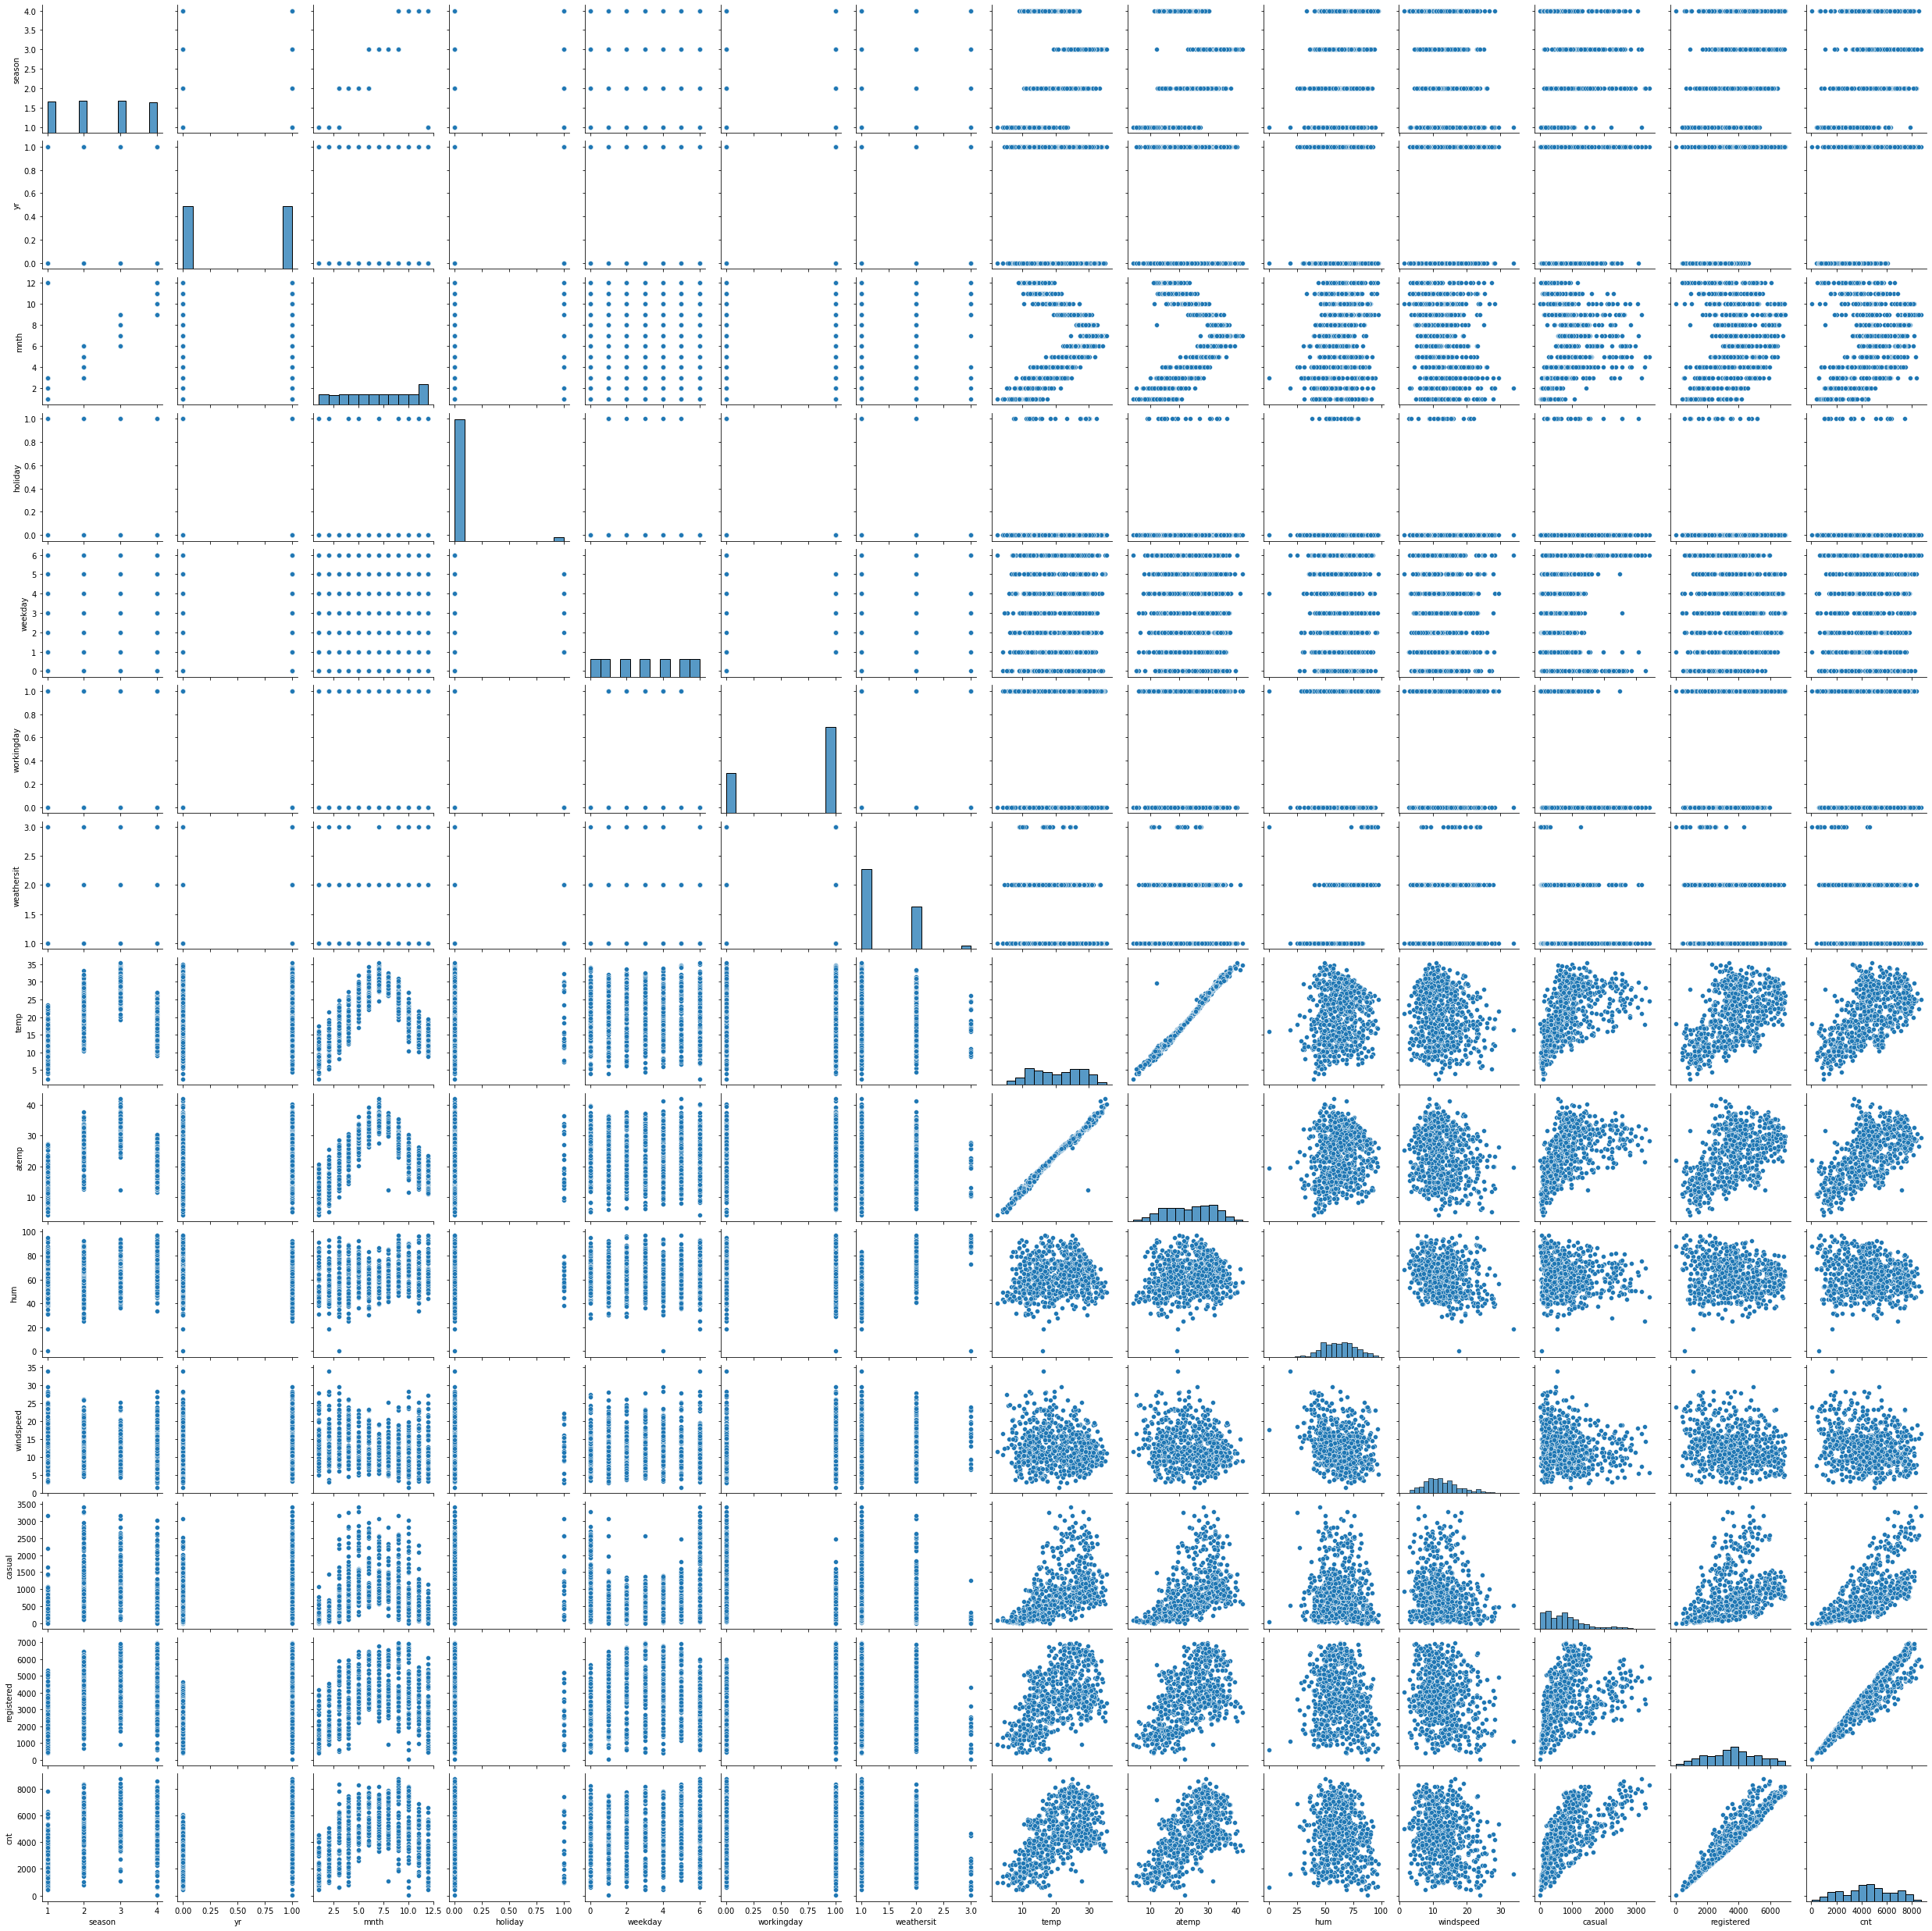

In [5]:
sns.pairplot(bike_data)
plt.show()

Form The data we can ascertain that count and 

causal+ registerd =count
so let me store the casual and registered and conun in target variable and drop casual and registred columns
the temp and atemp variables are highly correlated


so the data that needs to be manipulated and needs dummy variables 
 - need to convert season variable into 1.spring, 2.summer, 3.fall, 4.winter
 - nedd to convert weekday label into thier respective days and then into a dummy variable
 - same goes for weathersit
 - from the plot we can say that temp and atemp are linearily variable
 
so the finally the target variable is :
 - casual, registered, cnt

so the categorical variables are:
 - season yr month holiday weathersit

### Heat Map

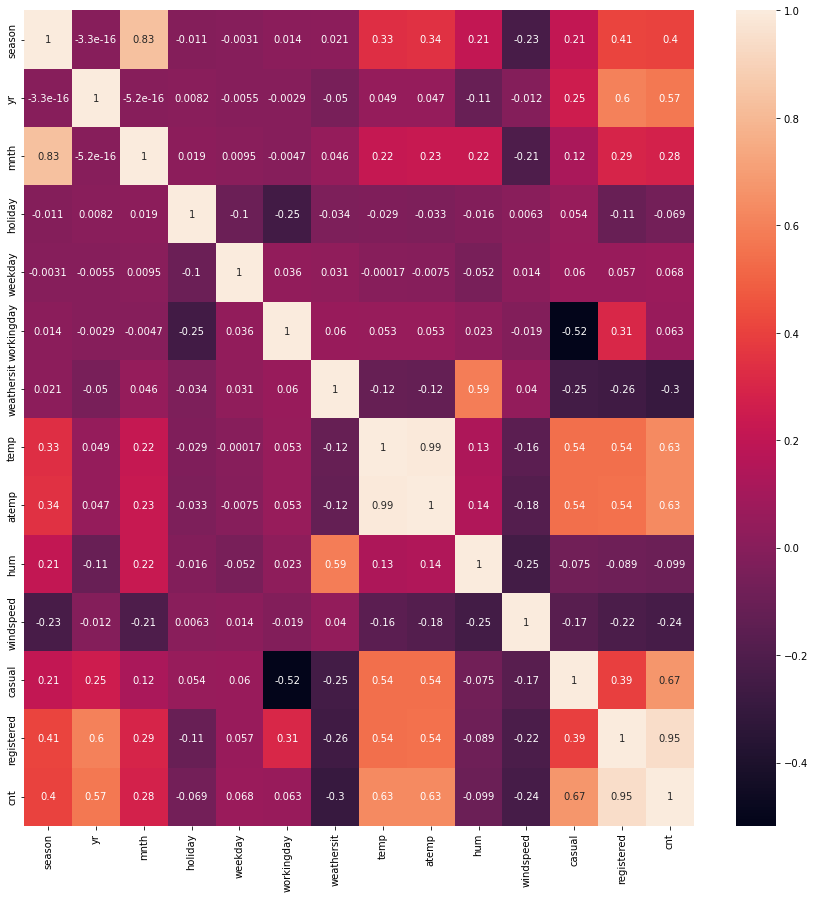

In [6]:
# again checking the heatmap
plt.figure(figsize=(15,15))
sns.heatmap(bike_data.corr(),annot=True)
plt.show()

### A Probability Distribution Function

C:\Users\shray\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


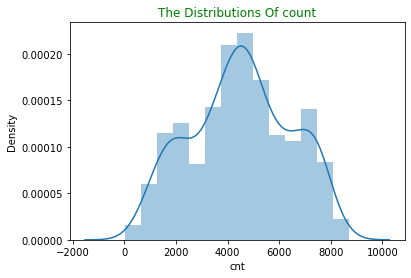

In [7]:
sns.distplot(bike_data["cnt"])
plt.title("The Distributions Of count",fontdict={"fontsize":12,"fontweight":7,"color":"green"})
plt.show()

The above distribution is almost normal but with a few kinks let us see if the categorical variable can explain it.

Let us delve into the Exploratory Data Analysis

### Bivariate Analysis (segmented analysis)

In [8]:
#just to check the signifucance level of other things
print("the mean of the bike data count",bike_data["cnt"].mean())
print("the standard deviation of the data count",bike_data["cnt"].std())

the mean of the bike data count 4508.006849315068
the standard deviation of the data count 1936.0116473612595


mean and std dev of the mean so we can guesstimate the whther the difference is significant or not

                 cnt
yr mnth             
0  1     1231.903226
   2     1721.964286
   3     2065.967742
   4     3162.333333
   5     4381.322581
   6     4783.733333
   7     4559.387097
   8     4409.387097
   9     4247.266667
   10    3984.225806
   11    3405.566667
   12    2816.870968
1  1     3120.774194
   2     3617.964286
   3     5318.548387
   4     5807.466667
   5     6318.225806
   6     6761.000000
   7     6567.967742
   8     6919.451613
   9     7285.766667
   10    6414.225806
   11    5088.800000
   12    3990.741935


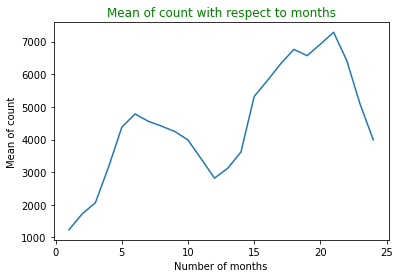

In [9]:
a_yrmnthgroup=bike_data[["yr","mnth","cnt"]].groupby(by=["yr","mnth"]).mean()
print(a_yrmnthgroup)


z=[]
for a in a_yrmnthgroup.index:
    i,c=a
    z.append(i*12+c)

    
plt.plot(z,a_yrmnthgroup["cnt"])
plt.title("Mean of count with respect to months",fontdict={"fontsize":12,"fontweight":7,"color":"green"})
plt.xlabel("Number of months",fontdict={"fontsize":10,"fontweight":10,"color":"black"})
plt.ylabel("Mean of count",fontdict={"fontsize":10,"fontweight":10,"color":"black"})
plt.show()   

so form above we can observe that the first year graph closely follows the second year graph with +2000
and the variance across the month if also the same so far the target month seems to be from may - October highest performance in both the yeras 

                cnt
season             
1       2608.411111
2       4992.331522
3       5644.303191
4       4728.162921


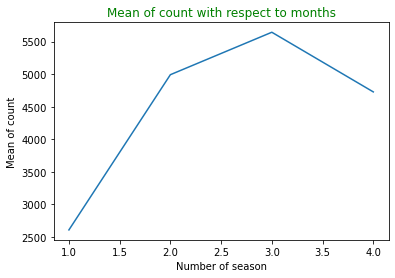

In [10]:
# let us see if there is significance variance across the season
var_season=bike_data[["season","cnt"]].groupby(by="season").mean()
print(var_season)

plt.plot(var_season.index,var_season["cnt"])
plt.title("Mean of count with respect to months",fontdict={"fontsize":12,"fontweight":7,"color":"green"})
plt.xlabel("Number of season",fontdict={"fontsize":10,"fontweight":10,"color":"black"})
plt.ylabel("Mean of count",fontdict={"fontsize":10,"fontweight":10,"color":"black"})
plt.show()   

There is clearly a very hughe variance across the 4 seaosn 

1:spring --> lowest<br>
2:summer --> higher<br>
3:fall   --> highest<br>
4:winter --> 3rd but not significantly less<br>

                 cnt
weekday             
0        4228.828571
1        4338.123810
2        4510.663462
3        4574.893204
4        4667.259615
5        4690.288462
6        4550.542857


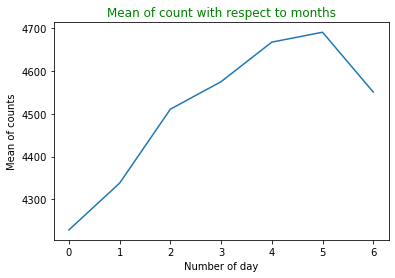

In [11]:
var_weekday=bike_data[["weekday","cnt"]].groupby(by="weekday").mean()
print(var_weekday)

plt.plot(var_weekday.index,var_weekday["cnt"])
plt.title("Mean of count with respect to months",fontdict={"fontsize":12,"fontweight":7,"color":"green"})
plt.xlabel("Number of day",fontdict={"fontsize":10,"fontweight":10,"color":"black"})
plt.ylabel("Mean of counts",fontdict={"fontsize":10,"fontweight":10,"color":"black"})
plt.show()   

Inhere we can observe thath there is a slight differnce but not significantlty to separate itself from others<br>
this may be dropped nothing much to gleen from this

In [12]:
var_workingday=bike_data[["workingday","cnt"]].groupby(by="workingday").mean()
print(var_workingday)

                    cnt
workingday             
0           4330.168831
1           4590.332665


No major significance difference between the two values

In [13]:
var_holiday=bike_data[["holiday","cnt"]].groupby(by="holiday").mean()
print(var_holiday)

                cnt
holiday            
0        4530.90268
1        3735.00000


There is significant drop during the holidays as expected.

In [14]:
#finallly the weathersit
var_weathersit=bike_data[["weathersit","cnt"]].groupby(by="weathersit").mean()
print(var_weathersit)

                    cnt
weathersit             
1           4876.786177
2           4044.813008
3           1803.285714


In [15]:
bike_data["weathersit"].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In here the explianotary values for the weathersit variable are :
        - 1: Clear, Few clouds, Partly cloudy, Partly cloudy                                            :FINE<br>
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               :CLOUDY<br>
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    :RAINY<br>
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog                                 :RAINY + SNOWY<br>

### Manipulating and rencoding the data

In [16]:
# manipulating the vale of season, weathersit and weekdays:
dict_season={1:"spring",2:"summer",3:"fall",4:"winter"}
dict_wethersit={1:"fine",2:"cloudy",3:"rainy",4:"rainy+snowy"}
dict_weekdays={0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"}

bike_data["season"]=[dict_season[i] for i in bike_data["season"]]
bike_data["weathersit"]=[dict_wethersit[i] for i in bike_data["weathersit"]]
bike_data["weekday"]=[dict_weekdays[i] for i in bike_data["weekday"]]

In [17]:
dummies=pd.get_dummies(bike_data[["season","weathersit","weekday"]],drop_first=True)
dummies

,season_spring,season_summer,season_winter,weathersit_fine,weathersit_rainy,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
instant,,,,,,,,,,,
1,1,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,0
3,1,0,0,1,0,1,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,1,0
5,1,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
726,1,0,0,0,0,0,0,0,1,0,0
727,1,0,0,0,0,0,0,0,0,0,0
728,1,0,0,0,0,0,1,0,0,0,0


### Concatenating the Data

In [18]:
new_bike_data=pd.concat([bike_data,dummies],axis=1)

In [19]:
new_bikedata=new_bike_data.drop(columns=["dteday","weekday","weathersit","season","casual","registered"])

In [20]:
new_bikedata.columns

Index(['yr', 'mnth', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'season_spring', 'season_summer', 'season_winter',
       'weathersit_fine', 'weathersit_rainy', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

## Train and Test Split

In [21]:
dtrain,dtest=train_test_split(new_bikedata,test_size=0.8,random_state=10)

In [22]:
type(dtrain)

pandas.core.frame.DataFrame

### Feature Scaling

In [23]:
Scaler=MinMaxScaler()
dtrain=pd.DataFrame(Scaler.fit_transform(dtrain),columns=dtrain.columns)
dtest=pd.DataFrame(Scaler.transform(dtest),columns=dtest.columns)

In [24]:
dtrain.columns

Index(['yr', 'mnth', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'season_spring', 'season_summer', 'season_winter',
       'weathersit_fine', 'weathersit_rainy', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

### Feature Selection Using Statsmodels.formula:(Manual)
This is a method we learnt during live class.

### Model 1 with all the variables

In [25]:
lr_model=smf.ols(formula="cnt ~ yr+mnth+holiday+workingday+temp+atemp+hum+windspeed+season_spring+season_summer+season_winter+weathersit_fine+weathersit_rainy+weekday_Monday+weekday_Saturday+weekday_Sunday+weekday_Thursday+weekday_Tuesday+weekday_Wednesday",data=dtrain)
lr_model=lr_model.fit()
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     44.24
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           6.91e-46
Time:                        19:44:03   Log-Likelihood:                 141.64
No. Observations:                 146   AIC:                            -245.3
Df Residuals:                     127   BIC:                            -188.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.2034      0.063      3.254      0.001       0.080       0.327
yr                    0.2517      0.018     13.954      0.000       0.216       0.287
mnth                 -0.0136      0.043     -0.319      0.750      -0.098       0.071
holiday               0.0302      0.045      0.673      0.502      -0.059       0.119
workingday            0.0632      0.024      2.629      0.010       0.016       0.111
temp                 -0.1856      0.382     -0.486      0.628      -0.941       0.569
atemp                 0.7423      0.430      1.726      0.087      -0.109       1.593
hum                  -0.2134      0.071     -3.002      0.003      -0.354      -0.073
windspeed            -0.1509      0.046     -3.253      0.001      -0.243      -0.059
season_spring        -0.1056      0.045     -2.328      0.021      -0.195      -0.016
season_summer         0.0499      0.032      1.542      0.126      -0.014       0.114
season_winter         0.0866      0.041      2.117      0.036       0.006       0.167
weathersit_fine       0.0273      0.025      1.106      0.271      -0.022       0.076
weathersit_rainy     -0.1152      0.058     -1.970      0.051      -0.231       0.001
weekday_Monday       -0.0350      0.032     -1.102      0.273      -0.098       0.028
weekday_Saturday      0.0718      0.029      2.497      0.014       0.015       0.129
weekday_Sunday        0.0382      0.029      1.326      0.187      -0.019       0.095
weekday_Thursday      0.0178      0.033      0.547      0.586      -0.047       0.082
weekday_Tuesday       0.0152      0.030      0.512      0.610      -0.044       0.074
weekday_Wednesday    -0.0161      0.031     -0.529      0.597      -0.077       0.044
==============================================================================
Omnibus:                       14.013   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.227
Skew:                          -0.642   Prob(JB):                     0.000300
Kurtosis:                       4.010   Cond. No.                     2.33e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.01e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Model 2 :Only continuous data

In [26]:
lr_model=smf.ols(formula="cnt ~ temp+atemp+hum+windspeed",data=dtrain)
lr_model=lr_model.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     35.18
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           2.32e-20
Time:                        19:44:03   Log-Likelihood:                 47.359
No. Observations:                 146   AIC:                            -84.72
Df Residuals:                     141   BIC:                            -69.80
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4426      0.085      5.197      0.000       0.274       0.611
temp          -0.2789      0.649     -0.430      0.668      -1.562       1.005
atemp          1.0132      0.745      1.360      0.176      -0.460       2.486
hum           -0.3748      0.078     -4.779      0.000      -0.530      -0.220
windspeed     -0.2412      0.077     -3.124      0.002      -0.394      -0.089
==============================================================================
Omnibus:                        4.320   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.115   Jarque-Bera (JB):                2.478
Skew:                           0.024   Prob(JB):                        0.290
Kurtosis:                       2.364   Cond. No.                         92.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model 3 : Continuous variable without temp or atemp

In [27]:
lr_model=smf.ols(formula="cnt ~ atemp+hum+windspeed",data=dtrain)
lr_model=lr_model.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     47.12
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           3.37e-21
Time:                        19:44:03   Log-Likelihood:                 47.263
No. Observations:                 146   AIC:                            -86.53
Df Residuals:                     142   BIC:                            -74.59
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4658      0.066      7.104      0.000       0.336       0.595
atemp          0.6945      0.068     10.173      0.000       0.560       0.829
hum           -0.3745      0.078     -4.790      0.000      -0.529      -0.220
windspeed     -0.2535      0.071     -3.550      0.001      -0.395      -0.112
==============================================================================
Omnibus:                        5.479   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.065   Jarque-Bera (JB):                2.911
Skew:                           0.061   Prob(JB):                        0.233
Kurtosis:                       2.319   Cond. No.                         9.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
lr_model=smf.ols(formula="cnt ~ temp+hum+windspeed",data=dtrain)
lr_model=lr_model.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     46.02
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           7.71e-21
Time:                        19:44:03   Log-Likelihood:                 46.408
No. Observations:                 146   AIC:                            -84.82
Df Residuals:                     142   BIC:                            -72.88
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5201      0.063      8.198      0.000       0.395       0.646
temp           0.6001      0.060     10.031      0.000       0.482       0.718
hum           -0.3731      0.079     -4.744      0.000      -0.529      -0.218
windspeed     -0.2819      0.071     -3.952      0.000      -0.423      -0.141
==============================================================================
Omnibus:                        7.602   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                3.725
Skew:                           0.126   Prob(JB):                        0.155
Kurtosis:                       2.259   Cond. No.                         9.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model 4 :cateforical Variables only

In [29]:
lr_model=smf.ols(formula="cnt ~ yr+mnth+holiday+workingday+season_spring+season_summer+season_winter+weathersit_fine+weathersit_rainy+weekday_Monday+weekday_Saturday+weekday_Sunday+weekday_Thursday+weekday_Tuesday+weekday_Wednesday",data=dtrain)
lr_model=lr_model.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     34.41
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           4.69e-37
Time:                        19:44:03   Log-Likelihood:                 109.45
No. Observations:                 146   AIC:                            -188.9
Df Residuals:                     131   BIC:                            -144.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.3611      0.041      8.890      0.000       0.281       0.441
yr                    0.2681      0.021     12.557      0.000       0.226       0.310
mnth                 -0.0048      0.050     -0.098      0.922      -0.103       0.093
holiday               0.0388      0.053      0.732      0.465      -0.066       0.144
workingday            0.1264      0.024      5.379      0.000       0.080       0.173
season_spring        -0.3696      0.035    -10.552      0.000      -0.439      -0.300
season_summer        -0.0685      0.034     -2.011      0.046      -0.136      -0.001
season_winter        -0.1139      0.034     -3.303      0.001      -0.182      -0.046
weathersit_fine       0.0782      0.023      3.439      0.001       0.033       0.123
weathersit_rainy     -0.2714      0.065     -4.172      0.000      -0.400      -0.143
weekday_Monday       -0.0232      0.038     -0.604      0.547      -0.099       0.053
weekday_Saturday      0.1336      0.032      4.233      0.000       0.071       0.196
weekday_Sunday        0.0623      0.029      2.129      0.035       0.004       0.120
weekday_Thursday      0.0032      0.040      0.080      0.936      -0.075       0.082
weekday_Tuesday       0.0165      0.036      0.454      0.651      -0.055       0.088
weekday_Wednesday    -0.0348      0.037     -0.942      0.348      -0.108       0.038
==============================================================================
Omnibus:                        1.916   Durbin-Watson:                   2.334
Prob(Omnibus):                  0.384   Jarque-Bera (JB):                1.452
Skew:                          -0.189   Prob(JB):                        0.484
Kurtosis:                       3.310   Cond. No.                     2.55e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.53e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

From the Bivariate analysis removing working day and day of the week as they were within 1 sigma deviation of each other and fails the hypothesis test

## Model 5 : Categorical Variable weekday and working day

In [30]:
lr_model=smf.ols(formula="cnt ~ yr+mnth+holiday+season_spring+season_summer+season_winter+weathersit_fine+weathersit_rainy",data=dtrain)
lr_model=lr_model.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     59.25
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           9.15e-41
Time:                        19:44:03   Log-Likelihood:                 105.97
No. Observations:                 146   AIC:                            -193.9
Df Residuals:                     137   BIC:                            -167.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.4706      0.043     10.831      0.000       0.385       0.557
yr                   0.2708      0.021     13.160      0.000       0.230       0.312
mnth                 0.0096      0.049      0.197      0.844      -0.087       0.106
holiday             -0.0963      0.056     -1.706      0.090      -0.208       0.015
season_spring       -0.3673      0.034    -10.653      0.000      -0.436      -0.299
season_summer       -0.0661      0.034     -1.968      0.051      -0.132       0.000
season_winter       -0.1211      0.034     -3.571      0.000      -0.188      -0.054
weathersit_fine      0.0721      0.022      3.277      0.001       0.029       0.116
weathersit_rainy    -0.2789      0.064     -4.387      0.000      -0.405      -0.153
==============================================================================
Omnibus:                        1.855   Durbin-Watson:                   2.396
Prob(Omnibus):                  0.396   Jarque-Bera (JB):                1.412
Skew:                          -0.207   Prob(JB):                        0.494
Kurtosis:                       3.247   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model 6: Further Removing mnth 

In [31]:
lr_model=smf.ols(formula="cnt ~ yr+holiday+season_spring+season_summer+season_winter+weathersit_fine+weathersit_rainy",data=dtrain)
lr_model=lr_model.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     68.19
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           1.09e-41
Time:                        19:44:03   Log-Likelihood:                 105.95
No. Observations:                 146   AIC:                            -195.9
Df Residuals:                     138   BIC:                            -172.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.4768      0.030     15.919      0.000       0.418       0.536
yr                   0.2704      0.020     13.267      0.000       0.230       0.311
holiday             -0.0977      0.056     -1.753      0.082      -0.208       0.012
season_spring       -0.3707      0.030    -12.489      0.000      -0.429      -0.312
season_summer       -0.0687      0.031     -2.239      0.027      -0.129      -0.008
season_winter       -0.1183      0.031     -3.849      0.000      -0.179      -0.058
weathersit_fine      0.0720      0.022      3.284      0.001       0.029       0.115
weathersit_rainy    -0.2777      0.063     -4.403      0.000      -0.402      -0.153
==============================================================================
Omnibus:                        1.698   Durbin-Watson:                   2.395
Prob(Omnibus):                  0.428   Jarque-Bera (JB):                1.277
Skew:                          -0.201   Prob(JB):                        0.528
Kurtosis:                       3.221   Cond. No.                         9.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model 7 : Now combining the categorical and Continuous Variable

In [32]:
lr_model=smf.ols(formula="cnt ~ yr+atemp+holiday+hum+windspeed+season_spring+season_summer+season_winter+weathersit_fine+weathersit_rainy",data=dtrain)
lr_model=lr_model.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     80.93
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           5.17e-52
Time:                        19:44:03   Log-Likelihood:                 138.82
No. Observations:                 146   AIC:                            -255.6
Df Residuals:                     135   BIC:                            -222.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.2959      0.071      4.150      0.000       0.155       0.437
yr                   0.2502      0.017     14.460      0.000       0.216       0.284
atemp                0.5310      0.068      7.767      0.000       0.396       0.666
holiday             -0.0617      0.045     -1.359      0.176      -0.152       0.028
hum                 -0.2442      0.066     -3.725      0.000      -0.374      -0.115
windspeed           -0.1709      0.042     -4.037      0.000      -0.255      -0.087
season_spring       -0.1035      0.042     -2.495      0.014      -0.186      -0.021
season_summer        0.0514      0.029      1.789      0.076      -0.005       0.108
season_winter        0.0825      0.036      2.303      0.023       0.012       0.153
weathersit_fine      0.0194      0.023      0.833      0.406      -0.027       0.065
weathersit_rainy    -0.1082      0.056     -1.932      0.055      -0.219       0.003
==============================================================================
Omnibus:                       14.775   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.509
Skew:                          -0.658   Prob(JB):                     0.000158
Kurtosis:                       4.072   Cond. No.                         20.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model 8: removing the holiday varaible

In [33]:
lr_model=smf.ols(formula="cnt ~ yr+atemp+hum+windspeed+season_spring+season_summer+season_winter+weathersit_fine+weathersit_rainy",data=dtrain)
lr_model=lr_model.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     89.16
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           1.32e-52
Time:                        19:44:03   Log-Likelihood:                 137.83
No. Observations:                 146   AIC:                            -255.7
Df Residuals:                     136   BIC:                            -225.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.2972      0.072      4.155      0.000       0.156       0.439
yr                   0.2477      0.017     14.352      0.000       0.214       0.282
atemp                0.5349      0.069      7.805      0.000       0.399       0.670
hum                 -0.2464      0.066     -3.747      0.000      -0.376      -0.116
windspeed           -0.1780      0.042     -4.224      0.000      -0.261      -0.095
season_spring       -0.1051      0.042     -2.525      0.013      -0.187      -0.023
season_summer        0.0516      0.029      1.790      0.076      -0.005       0.109
season_winter        0.0828      0.036      2.303      0.023       0.012       0.154
weathersit_fine      0.0199      0.023      0.851      0.396      -0.026       0.066
weathersit_rainy    -0.1023      0.056     -1.827      0.070      -0.213       0.008
==============================================================================
Omnibus:                       14.036   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.222
Skew:                          -0.644   Prob(JB):                     0.000300
Kurtosis:                       4.004   Cond. No.                         20.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model 9: Removing weathesit_fine due to p-value

In [34]:
lr_model=smf.ols(formula="cnt ~ yr+atemp+windspeed+season_spring+season_summer+season_winter+weathersit_rainy",data=dtrain)
lr_model=lr_model.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     89.95
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           2.92e-48
Time:                        19:44:03   Log-Likelihood:                 122.10
No. Observations:                 146   AIC:                            -228.2
Df Residuals:                     138   BIC:                            -204.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.2068      0.064      3.252      0.001       0.081       0.332
yr                   0.2715      0.018     14.952      0.000       0.236       0.307
atemp                0.4730      0.074      6.408      0.000       0.327       0.619
windspeed           -0.1228      0.044     -2.789      0.006      -0.210      -0.036
season_spring       -0.1185      0.046     -2.580      0.011      -0.209      -0.028
season_summer        0.0271      0.032      0.860      0.391      -0.035       0.089
season_winter        0.0383      0.039      0.988      0.325      -0.038       0.115
weathersit_rainy    -0.2275      0.056     -4.032      0.000      -0.339      -0.116
==============================================================================
Omnibus:                       18.344   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.319
Skew:                          -0.652   Prob(JB):                     7.09e-07
Kurtosis:                       4.719   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Explantion : 
Model 1 : Here we just try every variable <br>
Model 2 : Here we use continuous variable to explain the variance<br>
Model 3 : atemp and temp are highly corelated <br>
Model 4 : use only categorical variables<br>
Model 5 : based on bivariate analysis and the summary of the previous model i remove workingday and weekday are removed<br>
Model 6 : month is cyclic in nature and would probly use some sine and cosine function for that and would be more dependable season but righ now i don't know how to do that<br>
Model 7,8 & 9 : some more fine Tuning<br>


So, the Variables selected are<br>
variable=["yr","atemp","windspeed","season_spring","season_summer","season_winter","weathersit_fine","weathersit_rainy"]

## Buliding The Model

In [35]:
y_train=dtrain["cnt"]
X_train=dtrain[["yr","atemp","windspeed","season_spring","season_summer","season_winter","weathersit_fine","weathersit_rainy"]]
X_train=sm.add_constant(X_train)
lr_model=sm.OLS(y_train,X_train)
lr_model=lr_model.fit()
lr_model.summary()

C:\Users\shray\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     89.99
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           1.01e-50
Time:                        19:44:03   Log-Likelihood:                 130.66
No. Observations:                 146   AIC:                            -243.3
Df Residuals:                     137   BIC:                            -216.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1466      0.062      2.368      0.019       0.024       0.269
yr                   0.2674      0.017     15.534      0.000       0.233       0.301
atemp                0.4770      0.070      6.827      0.000       0.339       0.615
windspeed           -0.1265      0.042     -3.034      0.003      -0.209      -0.044
season_spring       -0.1133      0.043     -2.605      0.010      -0.199      -0.027
season_summer        0.0442      0.030      1.469      0.144      -0.015       0.104
season_winter        0.0609      0.037      1.640      0.103      -0.013       0.134
weathersit_fine      0.0767      0.019      4.128      0.000       0.040       0.113
weathersit_rainy    -0.1765      0.055     -3.220      0.002      -0.285      -0.068
==============================================================================
Omnibus:                       15.257   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.288
Skew:                          -0.638   Prob(JB):                     6.48e-05
Kurtosis:                       4.241   Cond. No.                         19.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Predicting and evaluting the Model

C:\Users\shray\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\shray\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


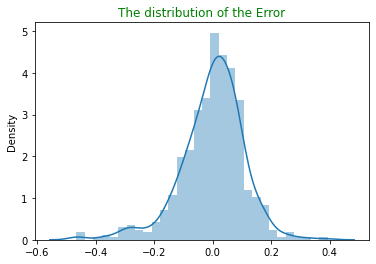

Error :  -0.5706185703636607


In [36]:
y_test=dtest["cnt"]
X_test=dtest[["yr","atemp","windspeed","season_spring","season_summer","season_winter","weathersit_fine","weathersit_rainy"]]
X_test=sm.add_constant(X_test)
y_pred=lr_model.predict(X_test)

error=y_test-y_pred
sns.distplot(error)
plt.title("The distribution of the Error",fontdict={"fontsize":12,"fontweight":7,"color":"green"})
plt.show()

print("Error : ",sum(error))

In [37]:
R2=r2_score(y_test,y_pred)
print("The R-squared value of the Model is :",R2)

The R-squared value of the Model is : 0.8009993136391258


### The R-Squared value is 0.8009